# Lab 6

# Random walks and the Barabási–Albert network model 

<hr>

# Random walks 

__Definition__ (Simple symmetric random walk on $\mathbb{Z}$)

Let  $X_1,X_2,\dots$ be i.i.d. random variables where each variable is either 1 or −1, with a 50% probability for either value, i.e.,
$$\mathbb{P}(X_1 = 1) = \mathbb{P}(X_1 = -1)= \frac{1}{2}$$

Set $S_0=0$, and $$S_n=\sum_{i=1}^{n}X_i$$

The series $S_n$ is called the simple symmetric random walk on $\mathbb{Z}$.

__Definition__ (Simple random walk on $\mathbb{Z}^d$)

Let $e_i$ denote the $d$-dimensional standard basis vector with 1 in its $i^{th}$ coordinate and 0 elsewhere. 

Let $X_1, X_2, \ldots$ be i.i.d. random variables where each variable is $\pm e_j$ for some $j \in \{1, \ldots, d\}$, more precisely:
$$\mathbb{P}(X_i = e_j) = \mathbb{P}(X_i = -e_j) = \frac{1}{2d}, \quad j=1,2,\ldots,d$$

Set $S_0$ the _origin_ of the $d$-dimensional space i.e. $S_0 = (0,\ldots,0)$, then the $d$-dimensional simple random walk of $n$ steps, denoted by $S_n$, is defined by
$$S_n = \sum_{i=1}^n X_i$$

In other words, on a symmetric simple random walk, the walker can move one
unit in any one of the $2d$ possible directions, and is equally likely to move in any one direction.

__Definition__ (Cauchy random walk):

Let  $X_1,X_2,\dots$ be i.i.d. [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) random variables. Set $S_0=0$, and $$S_n=\sum_{i=1}^{n}X_i$$

The series $S_n$ is called the Cauchy random walk.

## __Exercise 1__ 

1. Implement a function that simulates a trajectory of a 1D simple symmetric random walk. It should have one input parameter: ```number_of_steps``` denoting the number of steps, and its output should be a list/array which describes the trajectory/path of the random walk. The walker should start at zero. <br> Useful functions:
    * np.random.choice()
    * list.append() or np.append()
    * np.zeros
    * np.concatenate()
    * np.cumsum() or array.cumsum() where array is a numpy array
    
    
2. Plot the first 200 steps of a random walk with  plt.plot().


__This should take you about 15 minutes!__

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from scipy.optimize import curve_fit 

## Recurrence and transience of random walks 

__Definition__ (Recurrence & transience)

We say that a random walk is __recurrent__ if it visits its starting position __infinitely__ often with probability one. <br>
A random walk is __transient__ if it visits its starting position __finitely__ often with probability one.

__Note__: every random walk is either recurrent or transient.


__Theorem__ <br>
The simple symmetric random walk on $\mathbb{Z}^d$ is recurrent in dimensions $d = 1, 2$ and transient in dimensions $d \geq 3$

__Theorem__ (from [Exercise 11](https://math.bme.hu/~gabor/oktatas/SztoM/ApplStoch2020Fall_Ex1.pdf)): <br>
Let $S_n$ be a Cauchy random walk. Then for any $ \varepsilon> 0$, the expected number of returns to the interval $(−\varepsilon, \varepsilon)$ by the Cauchy walk $S_n$ is infinite

## __Exercise 2__ 

We are going to check the aforementioned theorems, so first we need functions that can generate multidimensional symmetric and Cauchy random walks. 

1. Implement a function, which returns a $d$-dimensional symmetric random walk. Let the number of steps and the dimension be inputs of the function.
    * __Hint__: use the [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) function, its output can be an array, you just have to set its `size` parameter. It is not a problem if the random walk jumps diagonally instead of horizontal and vertical jumps, i.e. it is also a great solution for the 2D random walk if it jumps in the direction of the following vertors: (1, 1); (-1, 1); (-1, -1); (1, -1).
2. Implement a function, which returns a $d$-dimensional Cauchy random walk. You can generate the Cauchy random variables with [np.random.standard_cauchy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html). Round the values of the steps with [np.around](https://numpy.org/doc/stable/reference/generated/numpy.around.html)
3. Plot the following random walks: 
    1. First 2000 steps of a one-dimensional symmetric random walk
    2. First 2000 steps of a one-dimensional Cauch random walk
    3. First 1000 steps of many (>10, can be 500 as well) one-dimensional random walk (they should be on the same figure)
    4. First 100 steps of a 2D symmetric random walk. Then try to plot the first 3000 steps of many 2D symmetric randomwalks on the same figure. 

What happens if we change the dimension parameter?

## __Exercise 3__

Let's calculate the average number of returns to the origin! 

1. Implement a function, called `num_of_returns`, which calculates the number of returns to the origin of a symmetric random walk, and the let the number of steps and dimension be parameters of the function.  
    * __Hint__: Use the following numpy functions: [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html), [np.all](https://numpy.org/doc/stable/reference/generated/numpy.all.html), and [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html).
2. Implement a function, called `avg_num_returns`, which has three imputs: `number_of_steps`, `dimension`, and `sample_size`. The function should use the `num_of_returns` function to calculate __sample_size__ times the number of returns of a `dimension` dimensional symmetric random walk after `number_of_steps` step. Briefly, calculate `sample_size` times the number of returns, then calculate its mean. 
3. Implement a function, called `avg_n_returns_list`, which has three parameters: `list_of_steps`, `dim`, `sample_size`. The function should do the following: 
    * For `n` in `list_of_steps`:
        * calculate the average number of returns using the `avg_num_returns` function, set its parameters to `n`, `dim` and `sample_size`
    * The function should return a list which contains the numbers that were calculated in the for loop.
    
    
4. Implement a function, called `cauchy_avg_n_returns_list`, which does the same as the previous function but for a Cauchy random walk, instead of the symmetric random walk. 

## __Exercise 4__

Calculate the average number of returns to the origin for 1, 2, and, 3 dimensional random walks with the `avg_n_returns_list` fucntion, and for the Cauchy random walk with the `cauchy_avg_n_returns_list`. Set the ```list_of_steps``` to ```range(10, 1000, 10)```. 

Create four separate scatter plots for the four type of random walks. Let x-axis be the ```list_of_steps``` and the y-axis be the output of the `avg_n_returns_list`/`cauchy_avg_n_returns_list`. Set the label of the y-axis to 'Average number of recurrences', and the label of the x-axis to 'Number of steps'.

What do these figures illustrate? Are these figures in alignment with the theorems about recurrence/transience of random walks?

---

---

---

# __The Barabási–Albert model__ 

The Barabási-Albert (BA) model, introduced by László Barabási-Albert and Réka Albert in [this paper](https://science.sciencemag.org/content/286/5439/509.full),  was inspired by the __[scale-free property](https://en.wikipedia.org/wiki/Scale-free_network)__ of real networks. The novelty of the model is the __growth__ and the __preferential attachment__ mechanism. Growth means, that (in contrast to the Erdős–Rényi), the number of nodes in the BA network increases over time.

The preferential attachment mechanism (also referred to as "the  rich get richer" or "Yule process") means that the newcomer nodes are more likely to connect to nodes with higher degree, i.e. the more connected a node is, the more likely it receives new links. This phenomena is well discernible in social networks, where a newcomer to a community is more likely to be acquainted with one of the more "visible" or socially active/friendly persons.

### __Algorithm of the model:__

Two parameters: $n$: number of nodes, and $m$: initial number of neighbours of a newcomer node

*  __Initial condition__: The model starts with a small network of $m_0$ nodes.
* __Growth__: At each iteration step, a newcomer node $v$ is added to the network and is connected to $u_1,\ldots, u_m$, $m\leq m_0$ existing nodes, with probability that is proportional to the degree of the $u_i$ nodes, i.e. the $p_i$ probability, that $v$ is connected to the node $u_i$ is
    $$ p_i = \frac{\deg (u_i)}{\sum_j \deg(v_j)},$$
    where the sum is made over all already existing $v_j$ 

Heavily linked nodes ("hubs") tend to quickly accumulate even more links, while nodes with only a few links are unlikely to be chosen as the destination for a new link. The new nodes have a "preference" to attach themselves to the already heavily linked nodes.

The steps of the growth of the network according to the Barabasi–Albert model $m_0=m=2$:

![ba_model_growth](https://upload.wikimedia.org/wikipedia/commons/4/48/Barabasi_Albert_model.gif)

### __Goal of the following exercises__

1. Understand the mechanism of the Barabási-Albert model
2. Check the scale-free property of the model
3. Check the small-world property of the model

In [101]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from scipy.optimize import curve_fit 

# __Exercise 5__

__Implement the Barabási-Albert model!__ Let the initial graph be a [path graph](https://en.wikipedia.org/wiki/Path_(graph_theory)) of $m$ nodes if $m\geq 2$, if $m=1$ then the initial graph should consist of 2 nodes. (you can create it with [nx.path_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.path_graph.html))

The function should have 2 input parameters: ```n``` and ```m``` denoting the number of nodes and the number of new neighbors respectively. 

Note that there are two possible implementations:
1. Update the degrees/probabilities after each attachment of a single edge $(v,\, u_i), \, \, i=1,\ldots,m$ 
2. Update the degrees/probabilities only at the beginning of each iteration, i.e. only before the attachment of all $(v,\, u_i), \, \, i=1,\ldots,m$   

The second one is easier to implement.

__If you feel lost, here are some hints:__
1. if $m < 1$ or $m \geq n$ then the function should print out that "Barabási-Albert network must have m>=1 and m<n"
2. Create an initial graph
3. Until the graph has less than `n` nodes do the following:
    1. Get the degrees of the nodes ([graph.degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html))
    2. Based on the degrees calculate the corresponding probabilities
    3. With the help of `np.random.choice` get the $u_1, u_2,\ldots,u_m$ newighbours of the newcomer $v$ node
    4. Create the new edges, i.e. ```[(v, u_1), (v, u_2), ... , (v, u_m)]```
    5. Add these new edges to the graph ([graph.add_edges_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_edges_from.html#networkx.Graph.add_edges_from))

You can draw your network with: [nx.draw(graph, node_size=25)](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw)

__This should take you about 20-25 minutes!__

# Degree distribution and scale-free property 

__Definition__ (Degree distribution)

The degree distribution is the probability distribution of these degrees over the whole network.

The degree distribution $P(k)$ of a network is  defined to be the fraction of nodes in the network with degree $k$. Thus if there are $n$ nodes in total in a network and $n_k$ of them have degree $k$, we have $$P(k) = \frac{n_k}{n}.$$

__Note__: In a [log-log scale plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) the power-law function is a straight line, and its slope is the exponent, since
$$\log P(k) \sim -\gamma \log k $$

Setting $X = \log k$ and $Y = \log P(k)$ yields $Y \sim -\gamma X$

__Definition__ (Scale-free property)

A scale-free network is a network whose degree distribution follows a power-law, at least asymptotically. That is, 
$$P(k)  \sim  k^{-\gamma},$$
where $\gamma$  is a parameter.

__Theorem__

The Barabási-Albert model is scale-free, i.e. the degree distribution resulting from the BA model is a power-law of the form
$$P(k)\sim k^{-3}$$

__Note__ : The $G(n, p)$ Erdős-Rényi model has binomal degree distribution:  $P(k)=\binom{n-1}{k}p^{k}(1-p)^{n-1-k}$

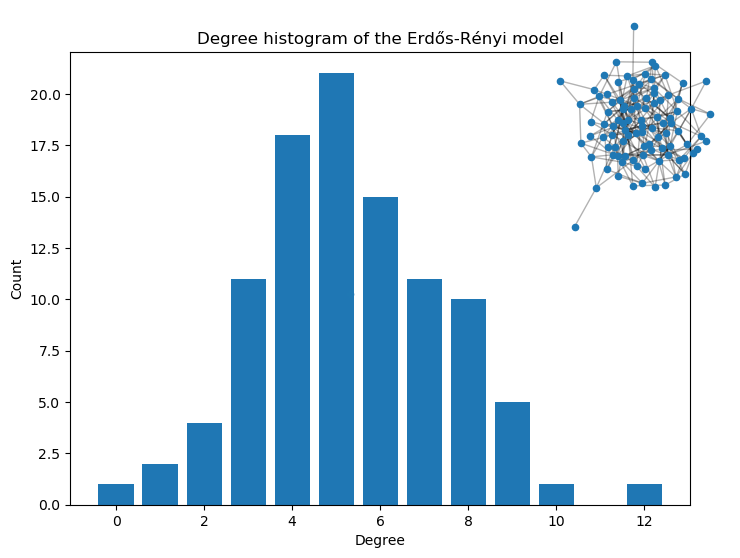

In [123]:
G = nx.fast_gnp_random_graph(100, 6/100)

degree_sequence = list(dict(G.degree).values())
degreeCount = dict(Counter(degree_sequence))
deg, cnt = degreeCount.keys(), degreeCount.values()

plt.figure(figsize=(8, 6), dpi=100)
plt.bar(deg, cnt, width=0.80)

plt.title("Degree histogram of the Erdős-Rényi model")
plt.ylabel("Count")
plt.xlabel("Degree")

# draw graph in inset
plt.axes([0.45, 0.45, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show()

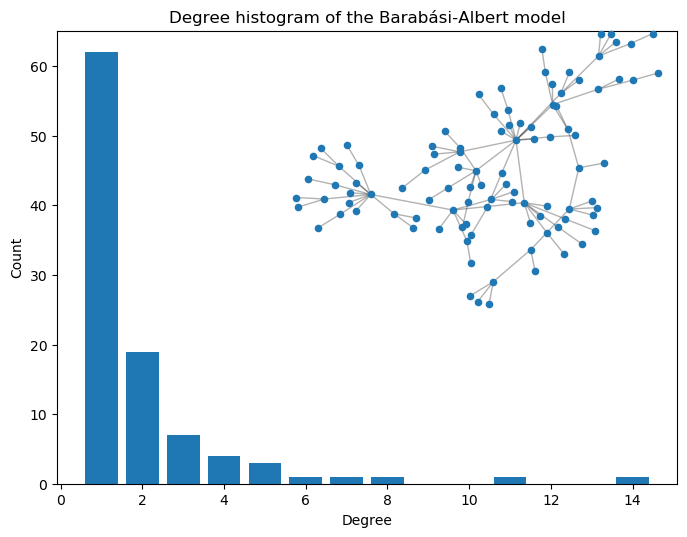

In [124]:
G = nx.barabasi_albert_graph(100, 1)

degree_sequence = list(dict(G.degree).values())
degreeCount = dict(Counter(degree_sequence))
deg, cnt = degreeCount.keys(), degreeCount.values()

plt.figure(figsize=(8, 6), dpi=100)
plt.bar(deg, cnt, width=0.80)

plt.title("Degree histogram of the Barabási-Albert model")
plt.ylabel("Count")
plt.xlabel("Degree")

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])

pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.show()

# __Exercise 6__ 

1. Generate a Barabasi-Albert graph with ```n=2000``` and ```m=50``` parameter setting. If your implementation does not work or very slow, then you can use the built-in function: [nx.barabasi_albert_graph(n, m)](https://networkx.github.io/documentation/networkx-2.3/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph). 
2. Plot the histogram of the degrees of the generated graph (use `plt.hist` with 16 bins)
3. Plot the degree distribution of the generated graph on a scatter plot. (Use the ```Counter``` function to get the counts of the degrees). Unfortunatelly, the automatic range of the y-axis is not always the best, you can correct it with [plt.ylim(bottom, top)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylim.html), e.g. ```plt.ylim(-0.001, 0.043)```.
    1. Duplicate your scatter plot, and set the scaling of both axes to logarithmic (log-log scale). __Hint__: type ```plt.xscale('log')``` and ```plt.yscale('log')```. <br> Probably you will have to reset the range of the y-axis.

__This should take you about 10 minutes!__

# __Exercise 7a__ 

Check the statement of the following theorem:

__Theorem__

The Barabási-Albert model is scale-free, i.e. the degree distribution resulting from the BA model is a power-law of the form
$$P(k)\sim k^{-3}$$

i.e. fit a power-law curve to the degree distribution of the graph, generated in __Exercise 6__.


__Task and hints:__
1. Use the given ```test_pow_law``` and the ```curve_fit``` function. 
    * The $x$ and $y$ variables in the ```curve_fit``` function should be the $x$ and $y$ variables plotted in the previous exercise, i.e. the degrees ($k$) and the degree distribution $P(k)$ <br> Is the fitted exponent (parameter b) close to the theoretical value ($\gamma = -3$)? 
2. Plot the degree distribution on a scatter plot (as in the previous exercice), and also plot the fitted power-law curve on the this figure.
    * Set the color of the fitted curve to red (```c='r'```), and its linestyle to dashed (```lw='--'```)

__This should take you about 10-12 minutes!__

In [97]:
def test_pow_law(x, a, b, c):
    return a*x**(-b) + c

# __Exercise 7b__ 

Since power-law looks linear on log-log scale, unfortunatelly, in practice the exponent is often estimated via linear regression on the logarithm of the degree distribution and the logarithm of the degrees, but this method produces inaccurate estimates. 

__Task__

Repeat __Exercise 3a__, but now fit a line to the logarithm of the data (i.e. set $x = \log k$, and $y=\log P(k)$):

1. Calculate the logarithm of the degree distribution and the corresponding degrees, and save them in numpy arrays.
2. Similarly to __Ex 3b__ use the ```test_lin``` function to fit a line to the logarithic data. <br>  Is the fitted exponent (parameter a) close to the theoretical value 
3. Plot the fitted line and the logarithmic data on a figure. 

__This should take you about 5 minutes!__

In [106]:
def test_lin(x, a, b):
    return a*x + b

__Note__ that there are more sophisticated methods to fit power-law distribution as described [here](https://arxiv.org/abs/0706.1062) and [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5330461/). There is a [python module](https://github.com/jeffalstott/powerlaw), called [powerlaw](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777), to determine if a probability distribution fits a power-law.  

# __Exercise 8__ 

__Definition__ (small-world property)

A network is said to be small-world, if the "typical" distance $L$ (i.e. the average length of shortest paths) between any two nodes grows proportionally to the logarithm of the size of the network i.e. $L \sim \log |V|$, where $V$ is the set of nodes. 

__Note__ that scale-free networks are ultra-small worlds, i.e. due to hubs, the shortest paths become significantly smaller and scale as $L \sim \log \log |V|$

__Theorem__

The average path length of the BA model increases approximately logarithmically with the size of the network, i.e. the average shortest path length of a BA(n, m) network is of order $\log n$. Moreover if $m>1$ the BA is ultra-small world. The actual form of $L$ has a double logarithmic correction and goes as
$$L\sim {\frac{\log n}{\log \log n}}$$

Investigate how the average shortest path length grows with the number of nodes $n$, for $m = 1, 2,$ and $9$!
1. Let ```network_sizes = range(10, 410, 10)```. 
2. Create three lists of average path lengths corresponding to the three values of m, i.e. <br> For m = 1, 2, 9:
    * Calculate the average shortest path length of BA(n, m) networks ```for n in network_sizes``` and save it in a list variable. 
3. On a single figure plot the following:
    1. The average shortests path lengths (y-axis) against the network sizes (x-axsis), i.e. the previously calculated three lists.
        * Set the labels as ```label='m=1'```, ```label='m=2'```, and ```label='m=2'``` correspondingly. 
    2. Plot the following curve:
        * $f(x)= \log(x)$, set its color to red, and its label to ```'log(n)'``` <br> __Hint__: Let x be ```np.linspace(10,400,400)```, then you can calculate $f(x)$ as ```np.log(x)``` 
        
        
4. Set the label of the x-axis to 'Number of nodes', and the label of the y-axis to 'Average shortest path length', and set the size of the figure to (10,8) (you can do it by typing ```plt.figure(figsize=(10,8))``` in the first line.